In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [100]:
X_train = pd.read_csv('/content/X_train.csv')
X_test = pd.read_csv('/content/X_test.csv')
y_test = pd.read_csv('/content/y_test.csv')
y_train =pd.read_csv('/content/y_train.csv')

X_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,35,49.20,1701.65,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,15,75.10,1151.55,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,13,40.55,590.35,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,26,73.50,1905.7,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
4,0,1,44.55,44.55,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [101]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          5634 non-null   int64  
 1   tenure                                 5634 non-null   int64  
 2   MonthlyCharges                         5634 non-null   float64
 3   TotalCharges                           5634 non-null   object 
 4   gender_Male                            5634 non-null   float64
 5   Partner_Yes                            5634 non-null   float64
 6   Dependents_Yes                         5634 non-null   float64
 7   PhoneService_Yes                       5634 non-null   float64
 8   MultipleLines_No phone service         5634 non-null   float64
 9   MultipleLines_Yes                      5634 non-null   float64
 10  InternetService_Fiber optic            5634 non-null   float64
 11  Inte

In [102]:
# Convert TotalCharges to numeric, setting errors='coerce' to convert non-numeric values to NaN
X_train['TotalCharges'] = pd.to_numeric(X_train['TotalCharges'], errors='coerce')
X_test['TotalCharges'] = pd.to_numeric(X_test['TotalCharges'], errors='coerce')

# Replace NaN values with the median of TotalCharges
X_train['TotalCharges'].fillna(X_train['TotalCharges'].median(), inplace=True)
X_test['TotalCharges'].fillna(X_test['TotalCharges'].median(), inplace=True)
# Verify there are no NaN values left
print(X_train['TotalCharges'].isna().sum())  # Should print 0



0


In [103]:
zero_variance_cols = X_train.std() == 0
print("Columns with zero variance:\n", X_train.columns[zero_variance_cols])


Columns with zero variance:
 Index([], dtype='object')


In [104]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [105]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 30), (1409, 30), (5634, 1), (1409, 1))

In [106]:
# Convert X_train back to DataFrame
X_train = pd.DataFrame(X_train)

# Now you can check .head()
print(X_train.head())


   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
0              0      35           49.20       1701.65          1.0   
1              0      15           75.10       1151.55          1.0   
2              0      13           40.55        590.35          1.0   
3              0      26           73.50       1905.70          0.0   
4              0       1           44.55         44.55          1.0   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0          0.0             0.0               0.0   
1          1.0             1.0               1.0   
2          1.0             1.0               0.0   
3          1.0             0.0               1.0   
4          1.0             1.0               1.0   

   MultipleLines_No phone service  MultipleLines_Yes  ...  \
0                             1.0                0.0  ...   
1                             0.0                0.0  ...   
2                             1.0                0.0  ...   
3               

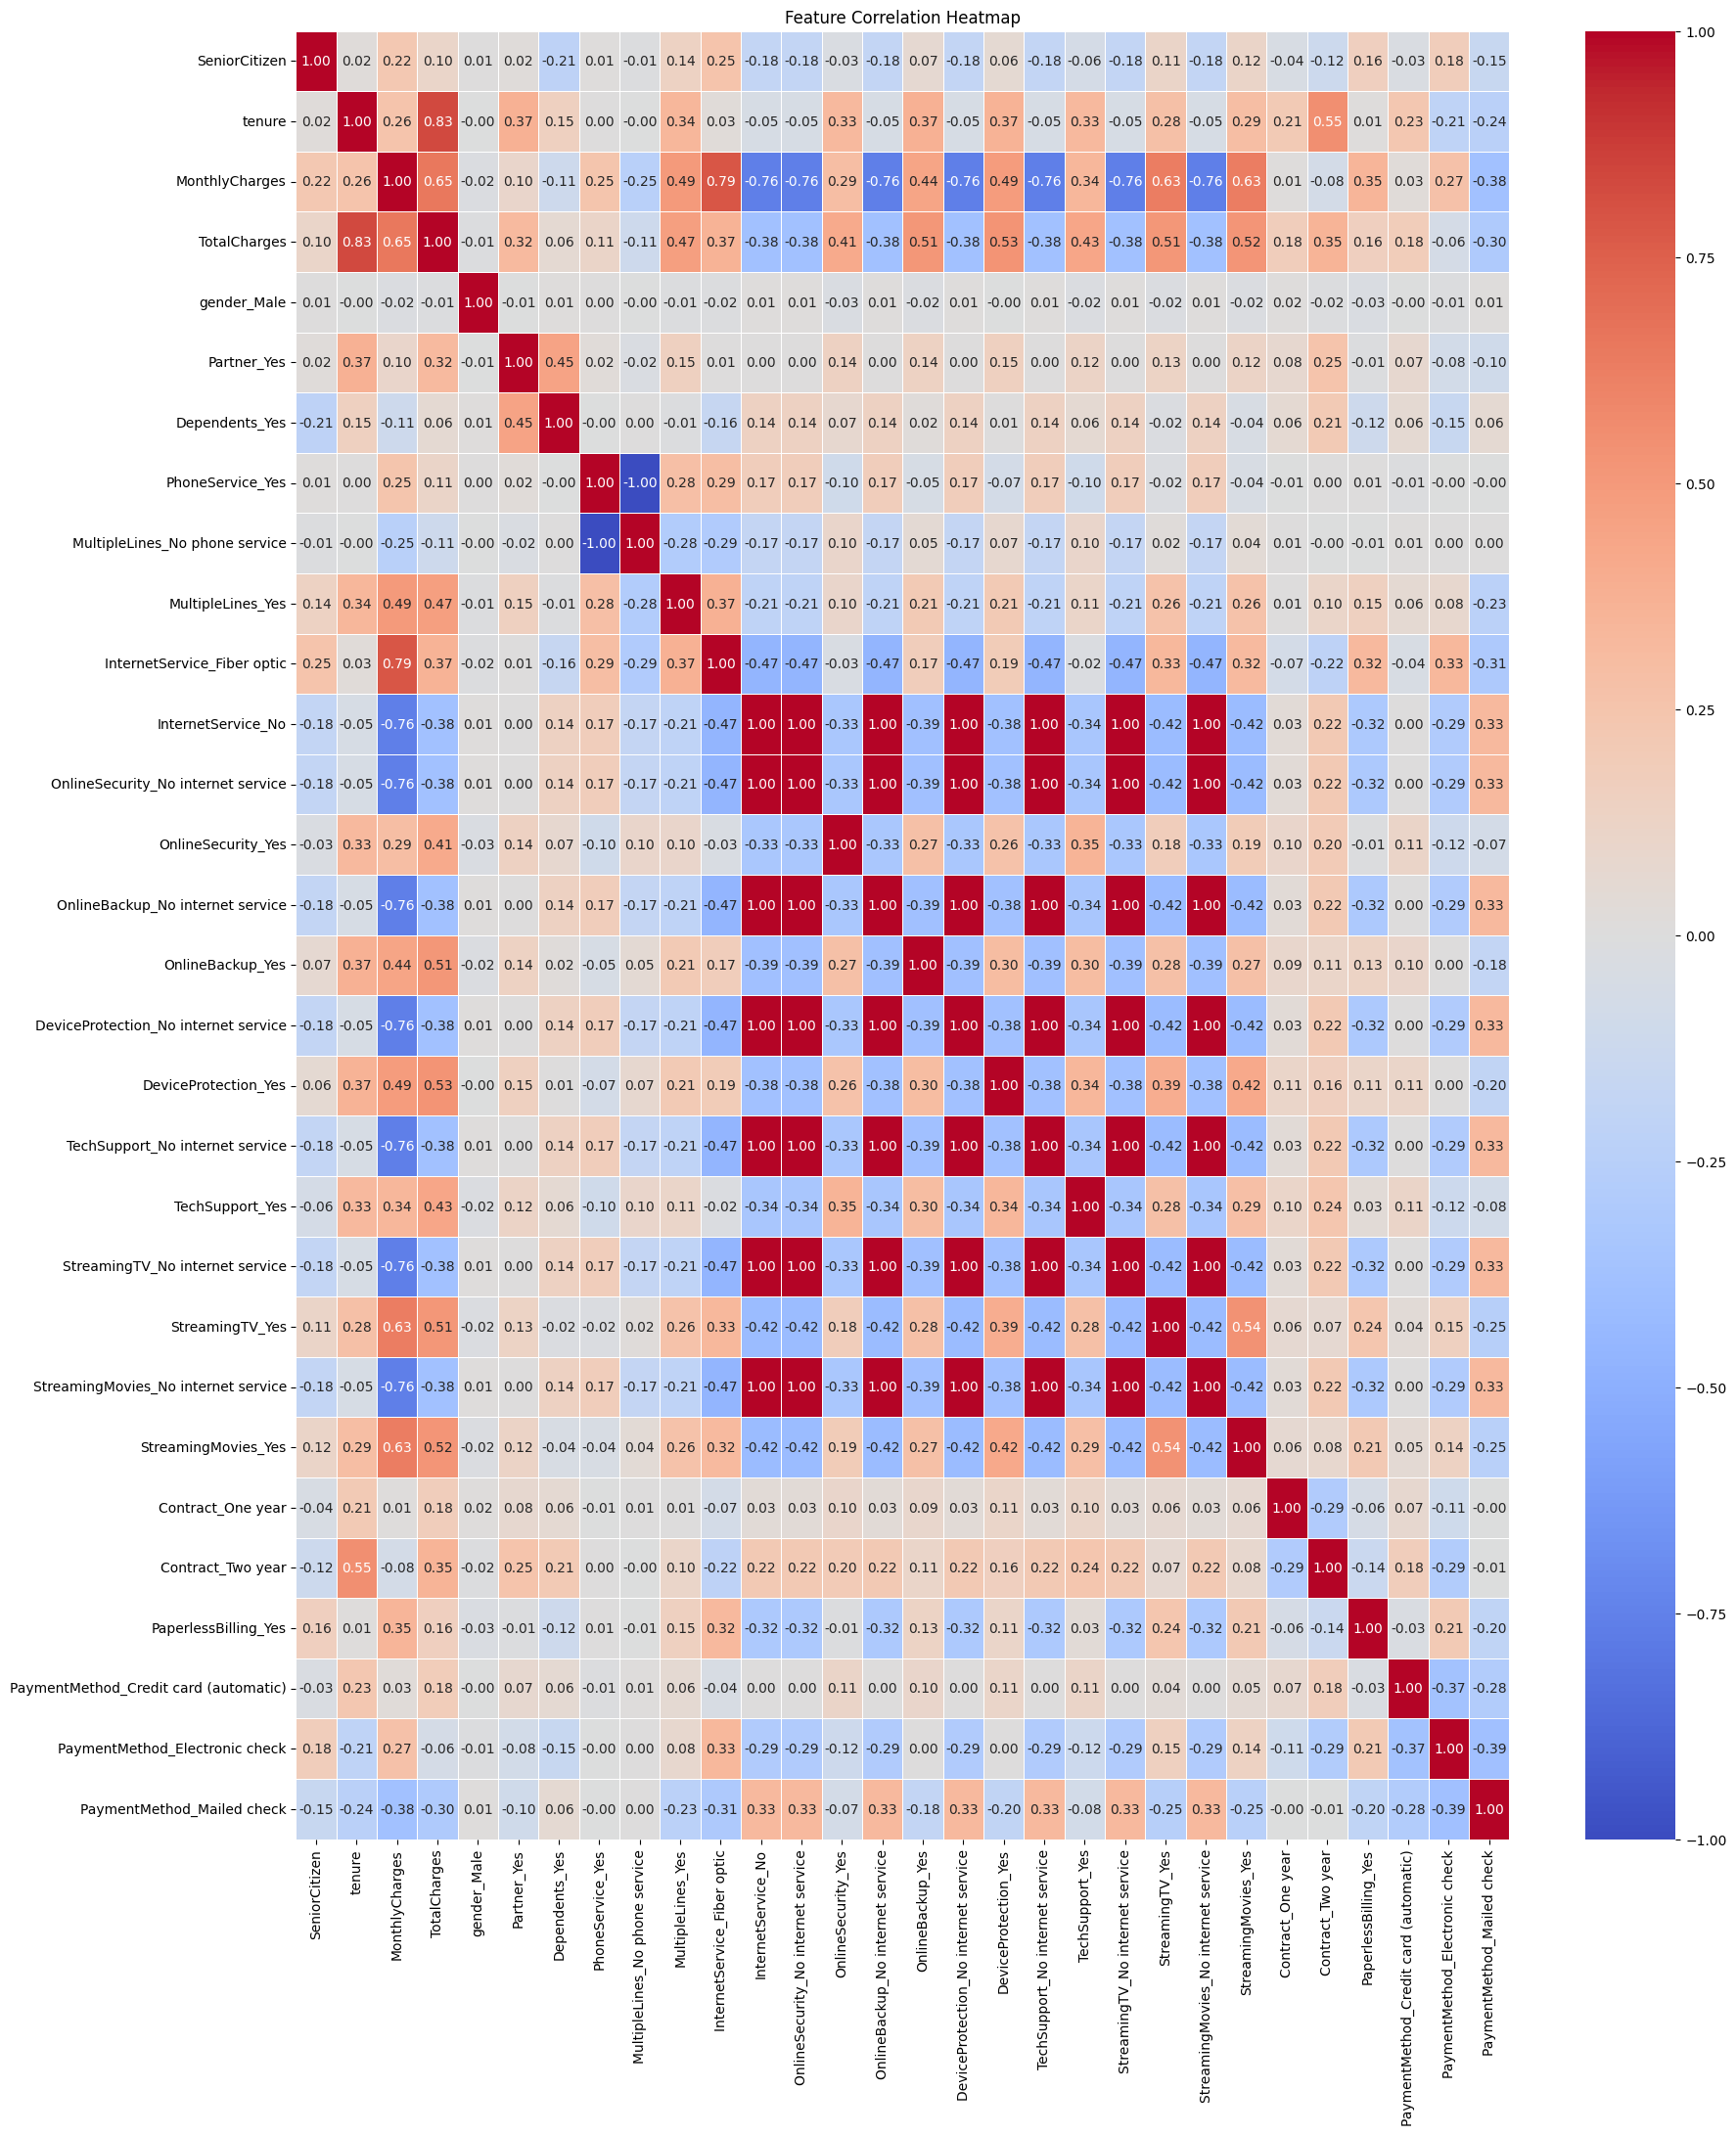

In [107]:
# Create the heatmap
plt.figure(figsize=(20, 24))  # Set figure size
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show the heatmap
plt.title("Feature Correlation Heatmap")
plt.show()

In [108]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          5634 non-null   int64  
 1   tenure                                 5634 non-null   int64  
 2   MonthlyCharges                         5634 non-null   float64
 3   TotalCharges                           5634 non-null   float64
 4   gender_Male                            5634 non-null   float64
 5   Partner_Yes                            5634 non-null   float64
 6   Dependents_Yes                         5634 non-null   float64
 7   PhoneService_Yes                       5634 non-null   float64
 8   MultipleLines_No phone service         5634 non-null   float64
 9   MultipleLines_Yes                      5634 non-null   float64
 10  InternetService_Fiber optic            5634 non-null   float64
 11  Inte

In [109]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001)  # Adjust alpha for feature selection strength
lasso.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.Series(lasso.coef_, index=X_train.columns)

# Sort features by importance
feature_importance = feature_importance.abs().sort_values(ascending=False)

# Print the top features
print("Top Features Selected by Lasso:\n", feature_importance)



Top Features Selected by Lasso:
 PhoneService_Yes                         0.123264
Contract_One year                        0.100249
OnlineSecurity_Yes                       0.075578
PaymentMethod_Electronic check           0.075488
TechSupport_Yes                          0.073938
Contract_Two year                        0.065596
PaperlessBilling_Yes                     0.047599
InternetService_Fiber optic              0.043006
OnlineBackup_Yes                         0.040151
SeniorCitizen                            0.029562
Dependents_Yes                           0.026375
DeviceProtection_Yes                     0.023037
MultipleLines_Yes                        0.022390
MonthlyCharges                           0.005695
tenure                                   0.001598
PaymentMethod_Credit card (automatic)    0.000321
TotalCharges                             0.000050
StreamingMovies_No internet service      0.000000
gender_Male                              0.000000
Partner_Yes      

In [110]:
# Select only the features with nonzero coefficients
selected_features = feature_importance[feature_importance > 0].index

# Drop unimportant features (zero coefficient features)
X_train_selected = X_train[selected_features]

# If you also have a test set, apply the same feature selection
X_test_selected = X_test[selected_features]

# Print the remaining features
print("Selected Features:\n", selected_features)


Selected Features:
 Index(['PhoneService_Yes', 'Contract_One year', 'OnlineSecurity_Yes',
       'PaymentMethod_Electronic check', 'TechSupport_Yes',
       'Contract_Two year', 'PaperlessBilling_Yes',
       'InternetService_Fiber optic', 'OnlineBackup_Yes', 'SeniorCitizen',
       'Dependents_Yes', 'DeviceProtection_Yes', 'MultipleLines_Yes',
       'MonthlyCharges', 'tenure', 'PaymentMethod_Credit card (automatic)',
       'TotalCharges'],
      dtype='object')


In [111]:
X_train_selected.to_csv("selected_features.csv", index=False)
X_test_selected.to_csv("selected_features_test.csv", index=False)
